In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/dataset_valori_phishing.xlsx'

In [6]:
# Carica il file Excel
phishing_data = pd.read_excel(file_path)

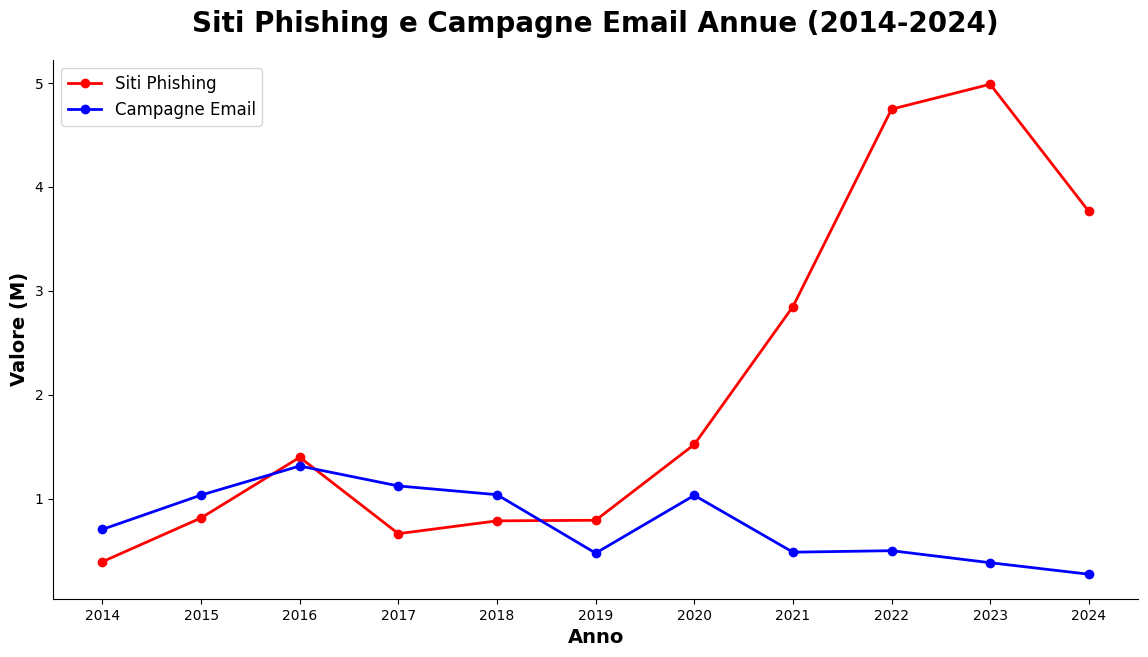

In [7]:
# Crea il grafico a linee
fig, ax = plt.subplots(figsize=(14, 7))

# Grafico a linea per siti di phishing e campagne email
ax.plot(phishing_data['Anno'], phishing_data['Siti_Phishing_Annui'],
        marker='o', color='#ff0000', label='Siti Phishing', linewidth=2)

ax.plot(phishing_data['Anno'], phishing_data['Campagne_Email_Annue'],
        marker='o', color='#0000ff', label='Campagne Email', linewidth=2)

# Personalizzazione del grafico
ax.set_title('Siti Phishing e Campagne Email Annue (2014-2024)',
             fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Anno', fontsize=14, fontweight='bold')
ax.set_ylabel('Valore (M)', fontsize=14, fontweight='bold')

# Mostra tutti gli anni sull'asse x
ax.set_xticks(phishing_data['Anno'])

# Formatta l'asse y per mostrare i valori in milioni e rimuovere "1e6"
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}'))

# Rimuove la griglia
ax.grid(False)

# Rimuove le linee superiori e destre
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Aggiungi la legenda
ax.legend(fontsize=12)

# Salva il grafico
plt.savefig('trend_phishing_campagne_final.png', format='png', dpi=200, bbox_inches='tight')

# Mostra il grafico
plt.show()


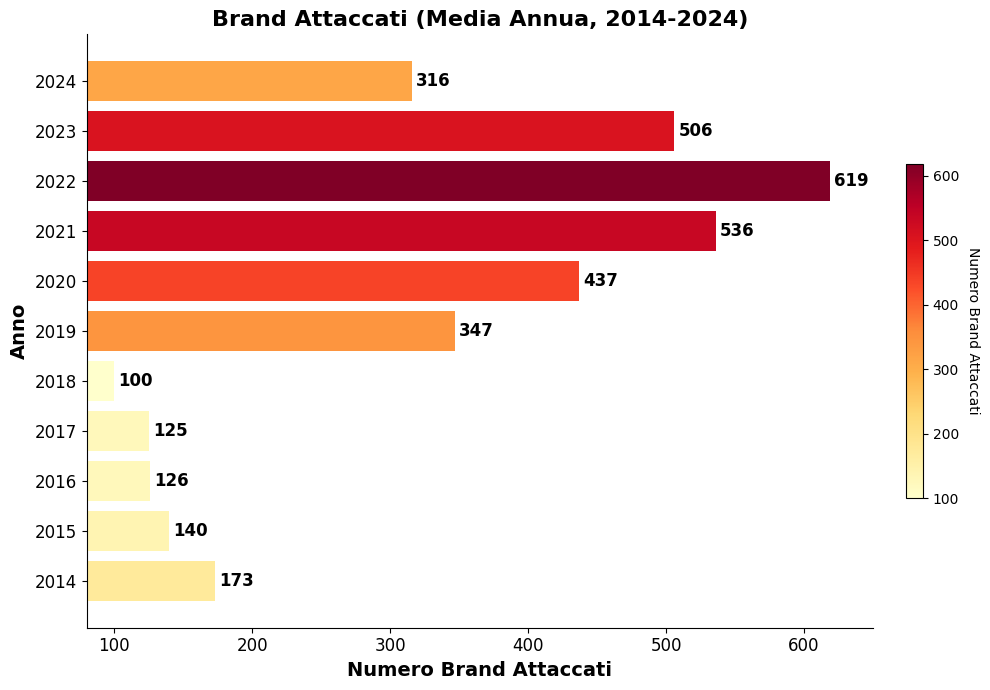

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Estraggo i dati necessari
anni = phishing_data['Anno']
valori = phishing_data['Brand_Targetizzati_Media']

# Uso la scala "YlOrRd" predefinita di Matplotlib
cmap = plt.cm.YlOrRd

# Normalizzo i valori per la mappa di colori
norm = plt.Normalize(valori.min(), valori.max())

# Assegno i colori in base ai valori
colori = cmap(norm(valori))

# Creo il grafico
plt.figure(figsize=(10, 7), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')
bars = plt.barh(anni, valori, color=colori)
plt.title('Brand Attaccati (Media Annua, 2014-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Numero Brand Attaccati', fontsize=14, fontweight='bold')
plt.ylabel('Anno', fontsize=14, fontweight='bold')

# Aggiungo la barra dei colori per spiegare la scala
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Numero Brand Attaccati', rotation=270, labelpad=15)

# Trova il valore massimo
max_value = valori.max()

# Aggiungo le etichette a destra di ogni barra
for bar in bars:
    width = bar.get_width()
    #color = '#ff0000' if width == max_value else 'black'
    offset = 3
    plt.text(width + offset, bar.get_y() + bar.get_height()/2.,
             f'{width:,}',
             va='center', ha='left', fontsize=12, fontweight='bold', color=color)

# Imposto il limite inferiore dell'asse x
min_value = valori.min()
plt.xlim(left=min_value * 0.8)

# Nascondo i bordi superiori e destri
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(anni)  # Mostro tutti gli anni sull'asse y
plt.tight_layout()
plt.show()
